In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from scipy.stats import norm

In [54]:
with open('trajectories.pkl', 'rb') as f:
    trajs = pickle.load(f)

In [55]:
trajs

{0: {'w': [1.0, -0.5, 0.5],
  'rew_wrt_optimal': -8.283598003728022,
  'sum_feature_vector': array([-5.283598,  0.      , -6.      ]),
  'ranking_on_scale': 1.0},
 1: {'w': [0.8900226601237232, -0.07101072222061991, 0.18098806209689672],
  'rew_wrt_optimal': -8.283598003728022,
  'sum_feature_vector': array([-5.283598,  0.      , -6.      ]),
  'ranking_on_scale': 1.0},
 2: {'w': [0.7977914645740691, -1.0445680896487985, 1.2467766250747294],
  'rew_wrt_optimal': -8.283598003728022,
  'sum_feature_vector': array([-5.283598,  0.      , -6.      ]),
  'ranking_on_scale': 1.0},
 3: {'w': [0.7999693088459933, -0.4235441141495014, 0.6235748053035081],
  'rew_wrt_optimal': -8.283598003728022,
  'sum_feature_vector': array([-5.283598,  0.      , -6.      ]),
  'ranking_on_scale': 1.0},
 4: {'w': [2.7912144481460355, -2.7541933591212135, 0.9629789109751783],
  'rew_wrt_optimal': -8.283598003728022,
  'sum_feature_vector': array([-5.283598,  0.      , -6.      ]),
  'ranking_on_scale': 1.0},
 5:

In [56]:
for i in range(1,100):
    if trajs[i]['rew_wrt_optimal'] == trajs[0]['rew_wrt_optimal']:
        trajs.pop(i, None)

In [57]:
trajs_rews = [trajs[i]['rew_wrt_optimal'] for i in trajs]
print("number of options", len(trajs_rews))

number of options 20


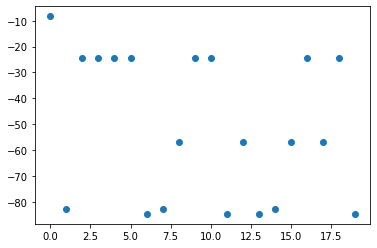

In [85]:
plt.scatter(range(len(trajs_rews)), trajs_rews)
plt.show()

In [59]:
trajs_keys = set(list(trajs.keys()))
group1 =  set(random.sample(trajs_keys, int(len(trajs_keys)/2)))
group2 = trajs_keys - group1

group1 = list(group1)
group2 = list(group2)

pairwise_dataset = {}
pairwise_data = [(group1[i], group2[i]) for i in range(len(group1))]
pairwise_data_w_scale = [(trajs[group1[i]]['ranking_on_scale'], 
                          trajs[group2[i]]['ranking_on_scale']) for i in range(len(group1))]

pairwise_data_w_choice = [(1 if trajs[group1[i]]['ranking_on_scale']>= 
                          trajs[group2[i]]['ranking_on_scale'] else 0) for i in range(len(group1))]



for i in range(len(pairwise_data)):
    pairwise_dataset[i] = {}
    pairwise_dataset[i]['comparison'] = pairwise_data[i]
    pairwise_dataset[i]['choice'] = pairwise_data_w_choice[i]
    pairwise_dataset[i]['scale'] = pairwise_data_w_scale[i]
 

In [60]:
pairwise_dataset

{0: {'comparison': (0, 35), 'choice': 1, 'scale': (1.0, 0.36510489637565696)},
 1: {'comparison': (64, 37), 'choice': 0, 'scale': (0.0, 0.7900141123494927)},
 2: {'comparison': (98, 7), 'choice': 0, 'scale': (0.0, 0.026315027619609365)},
 3: {'comparison': (38, 9),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 4: {'comparison': (71, 15),
  'choice': 0,
  'scale': (0.026315027619609365, 0.7900141123494927)},
 5: {'comparison': (75, 82),
  'choice': 1,
  'scale': (0.36510489637565696, 0.36510489637565696)},
 6: {'comparison': (14, 21),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 7: {'comparison': (81, 87),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 8: {'comparison': (51, 23), 'choice': 1, 'scale': (0.0, 0.0)},
 9: {'comparison': (24, 59),
  'choice': 0,
  'scale': (0.026315027619609365, 0.36510489637565696)}}

# Baseline 1: Just Choice Preferences

In [61]:
o1_features

array([-18.33488976,   4.        ,  -8.        ])

In [62]:
o2_features

array([-5.283598,  0.      , -6.      ])

In [63]:
candidate_w

[1.0, -0.5, 0.5]

In [64]:
o1_rew

-24.334889755725747

In [65]:
o2_rew

-8.283598003728022

In [66]:
np.exp(o1_rew)/(np.exp(o1_rew) + np.exp(o2_rew))

1.0690856944843292e-07

In [67]:
np.exp(o2_rew)/(np.exp(o1_rew) + np.exp(o2_rew))

0.9999998930914306

In [74]:
pairwise_dataset

{0: {'comparison': (0, 35), 'choice': 1, 'scale': (1.0, 0.36510489637565696)},
 1: {'comparison': (64, 37), 'choice': 0, 'scale': (0.0, 0.7900141123494927)},
 2: {'comparison': (98, 7), 'choice': 0, 'scale': (0.0, 0.026315027619609365)},
 3: {'comparison': (38, 9),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 4: {'comparison': (71, 15),
  'choice': 0,
  'scale': (0.026315027619609365, 0.7900141123494927)},
 5: {'comparison': (75, 82),
  'choice': 1,
  'scale': (0.36510489637565696, 0.36510489637565696)},
 6: {'comparison': (14, 21),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 7: {'comparison': (81, 87),
  'choice': 1,
  'scale': (0.7900141123494927, 0.7900141123494927)},
 8: {'comparison': (51, 23), 'choice': 1, 'scale': (0.0, 0.0)},
 9: {'comparison': (24, 59),
  'choice': 0,
  'scale': (0.026315027619609365, 0.36510489637565696)}}

In [106]:
choice_beliefs = {}
for keynum in trajs:
    choice_beliefs[keynum] = 1/len(trajs)

probs_of_true = [1/len(trajs)]
for i in range(len(pairwise_dataset)):
    o1, o2 = pairwise_dataset[i]['comparison']
    o1_features = trajs[o1]['sum_feature_vector']
    o2_features = trajs[o2]['sum_feature_vector']
    
    choice_i = pairwise_dataset[i]['choice']
    
    Z = 0
    
    for candidate_keynum in choice_beliefs:
#         print("candidate_keynum", candidate_keynum)
        candidate_w = trajs[candidate_keynum]['w']
#         print("candidate_w", candidate_w)
        o1_rew = np.dot(o1_features, candidate_w)
        o2_rew = np.dot(o2_features, candidate_w)
#         print("o1_rew", o1_rew)
#         print("o2_rew", o2_rew)
        rews = [float(o1_rew), float(o2_rew)]
        print("o1_rew", o1_rew)
        print("o2_rew", o2_rew)
        norm_rews = [(float(i) - min(rews)) / (1 if (max(rews) - min(rews)) == 0 else (max(rews) - min(rews))) for i in rews]
        print("norm_rews", norm_rews)
        o1_rew = norm_rews[0]
        o2_rew = norm_rews[1]
        
        print("o1_rew", o1_rew)
        print("o2_rew", o2_rew)
        
        if choice_i == 1:
            prob_w_given_choice = np.exp(o1_rew)/(np.exp(o1_rew) + np.exp(o2_rew))
        else:
            prob_w_given_choice = np.exp(o2_rew)/(np.exp(o1_rew) + np.exp(o2_rew))
            
#         print("prob_w_given_choice", prob_w_given_choice)
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_choice
        Z += choice_beliefs[candidate_keynum]
        
#         print()
    
        
    for candidate_keynum in choice_beliefs:
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z
        
    probs_of_true.append(choice_beliefs[0])
#     break


o1_rew -8.283598003728022
o2_rew -56.81489053111201
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew -73.98138894756923
o2_rew -529.1829573448739
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew 10.326951094732955
o2_rew 94.08391063810184
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 5.229304655098932
o2_rew 65.68137123482101
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 7.80247884131464
o2_rew 87.54542999538644
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 11.85171707791229
o2_rew 116.094447559473
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 53.13579471496475
o2_rew 503.86853672303005
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew -189.89156136666998
o2_rew -1398.7304876487797
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew 43.3599046796173
o2_rew 342.3362267642607
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 7.590818129110139
o2_rew 89.67354271946279
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 10.936493535783814
o2_rew 105.49328043407523
norm_rews [

o1_rew 59.18294810808825
o2_rew 65.68137123482101
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 83.4602174680441
o2_rew 87.54542999538644
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 110.6762317901333
o2_rew 116.094447559473
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 569.5665501948328
o2_rew 503.86853672303005
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew -1418.709253958932
o2_rew -1398.7304876487797
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 330.1320509239071
o2_rew 342.3362267642607
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 88.82934076370627
o2_rew 89.67354271946279
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 96.74252175550755
o2_rew 105.49328043407523
norm_rews [0.0, 1.0]
o1_rew 0.0
o2_rew 1.0
o1_rew 513.7128890915568
o2_rew 432.8401653765162
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew 324.0626900428414
o2_rew 309.14696012329415
norm_rews [1.0, 0.0]
o1_rew 1.0
o2_rew 0.0
o1_rew 2231.879017349297
o2_rew 2122.9918594728742
norm_rews [1.0,

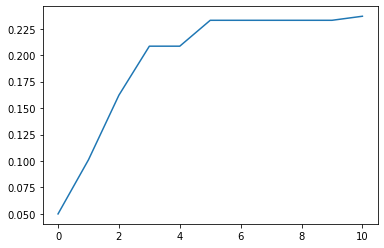

In [97]:
plt.plot(range(len(probs_of_true)), probs_of_true)
plt.show()


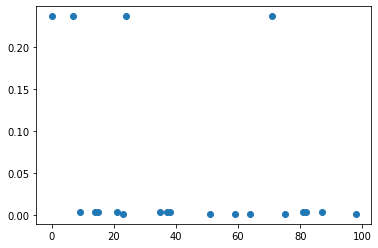

In [99]:
plt.scatter(choice_beliefs.keys(), choice_beliefs.values())
plt.show()

In [100]:
maxkey = max(choice_beliefs, key=choice_beliefs.get)
trajs[maxkey]['w']


[1.0, -0.5, 0.5]

In [101]:
trajs[0]['w']

[1.0, -0.5, 0.5]

# Baseline 2: Approach with only additional pairwise preferences

In [102]:
pairwise_dataset[0]

{'comparison': (0, 35), 'choice': 1, 'scale': (1.0, 0.36510489637565696)}

In [107]:
choice_beliefs = {}
for keynum in trajs:
    choice_beliefs[keynum] = 1/len(trajs)

seen_scale = []
    
probs_of_true_boot = [1/len(trajs)]
for i in range(len(pairwise_dataset)):
    o1, o2 = pairwise_dataset[i]['comparison']
    o1_features = trajs[o1]['sum_feature_vector']
    o2_features = trajs[o2]['sum_feature_vector']
    
    scale_i = pairwise_dataset[i]['scale']
    scale_o1, scale_o2 = scale_i
    choice_i = pairwise_dataset[i]['choice']
    
    
    Z = 0
    
    for candidate_keynum in choice_beliefs:
        candidate_w = trajs[candidate_keynum]['w']
        o1_rew = np.dot(o1_features, candidate_w)
        o2_rew = np.dot(o2_features, candidate_w)

        rews = [float(o1_rew), float(o2_rew)]

        norm_rews = [(float(i) - min(rews)) / (1 if (max(rews) - min(rews)) == 0 else (max(rews) - min(rews))) for i in rews]
        o1_rew = norm_rews[0]
        o2_rew = norm_rews[1]
        
        
        if choice_i == 1:
            prob_w_given_choice = np.exp(o1_rew)/(np.exp(o1_rew) + np.exp(o2_rew))
        else:
            prob_w_given_choice = np.exp(o2_rew)/(np.exp(o1_rew) + np.exp(o2_rew))
            
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_choice
        Z += choice_beliefs[candidate_keynum]
            
        
    for candidate_keynum in choice_beliefs:
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z
        
        
    # bootstrap the comparisons
    additional_comparisons = []
    for j in range(len(seen_scale)):
        oj, scale_oj = seen_scale[j]
        
        if scale_o1 > scale_oj:
            additional_comparisons.append((o1, oj, 1))
        elif scale_o1 < scale_oj:
            additional_comparisons.append((o1, oj, 0))
            
        if scale_o2 > scale_oj:
            additional_comparisons.append((o2, oj, 1))
        elif scale_o2 < scale_oj:
            additional_comparisons.append((o2, oj, 0))
    
    # make updates 
    for (oa, ob, choice_j) in additional_comparisons:
        oa_features = trajs[oa]['sum_feature_vector']
        ob_features = trajs[ob]['sum_feature_vector']

        Z = 0

        for candidate_keynum in choice_beliefs:
            candidate_w = trajs[candidate_keynum]['w']
            oa_rew = np.dot(oa_features, candidate_w)
            ob_rew = np.dot(ob_features, candidate_w)

            rews = [float(oa_rew), float(ob_rew)]

            norm_rews = [(float(i) - min(rews)) / (1 if (max(rews) - min(rews)) == 0 else (max(rews) - min(rews))) for i in rews]
            oa_rew = norm_rews[0]
            ob_rew = norm_rews[1]


            if choice_j == 1:
                prob_w_given_choice = np.exp(oa_rew)/(np.exp(oa_rew) + np.exp(ob_rew))
            else:
                prob_w_given_choice = np.exp(ob_rew)/(np.exp(oa_rew) + np.exp(ob_rew))

            choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_choice
            Z += choice_beliefs[candidate_keynum]


        for candidate_keynum in choice_beliefs:
            choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z
        
        
        
    probs_of_true_boot.append(choice_beliefs[0])
    
    seen_scale.append((o1, scale_o1))
    seen_scale.append((o2, scale_o2))
    
#     break


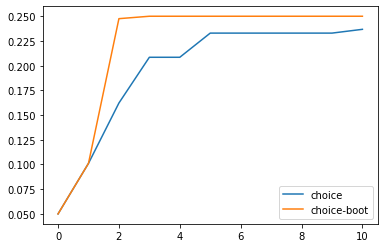

In [110]:
plt.plot(range(len(probs_of_true)), probs_of_true, label='choice')
plt.plot(range(len(probs_of_true_boot)), probs_of_true_boot, label='choice-boot')
plt.legend()
plt.show()


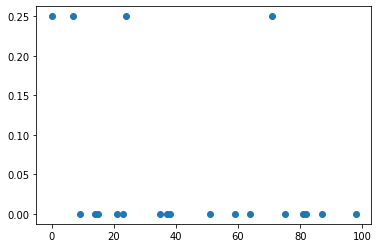

In [105]:
plt.scatter(choice_beliefs.keys(), choice_beliefs.values())
plt.show()

# Baseline 3: Scalar modification bayesian update

In [111]:
pairwise_dataset[0]['scale']

(1.0, 0.36510489637565696)

In [122]:
max_diff_lookup = {}


for candidate_keynum in choice_beliefs:
    candidate_w = trajs[candidate_keynum]['w']
    max_diff = 0
    for i in range(len(pairwise_dataset)):
        o1, o2 = pairwise_dataset[i]['comparison']

        o1_features = trajs[o1]['sum_feature_vector']
        o2_features = trajs[o2]['sum_feature_vector']

        o1_rew = np.dot(o1_features, candidate_w)
        o2_rew = np.dot(o2_features, candidate_w)
        
        rews = [float(o1_rew), float(o2_rew)]

        norm_rews = [(float(i) - min(rews)) / (1 if (max(rews) - min(rews)) == 0 else (max(rews) - min(rews))) for i in rews]
        o1_rew = norm_rews[0]
        o2_rew = norm_rews[1]

        diff = abs(o1_rew - o2_rew)
        if diff > max_diff:
            max_diff = diff
            
    max_diff_lookup[candidate_keynum] = max_diff


In [148]:
choice_beliefs = {}
for keynum in trajs:
    choice_beliefs[keynum] = 1/len(trajs)

seen_scale = []
    
probs_of_true_scalar = [1/len(trajs)]
for i in range(len(pairwise_dataset)):
    choice_i = pairwise_dataset[i]['choice']
    scale_i = pairwise_dataset[i]['scale']
    
    if choice_i == 1:
        o1, o2 = pairwise_dataset[i]['comparison']
        scale_o1, scale_o2 = scale_i
    else:
        o2, o1 = pairwise_dataset[i]['comparison']
        scale_o2, scale_o1 = scale_i
    
    o1_features = trajs[o1]['sum_feature_vector']
    o2_features = trajs[o2]['sum_feature_vector']
    
    psi = scale_o1 - scale_o2 
    mu = psi + np.random.normal(0,sigma)
    
    Z = 0
    
    for candidate_keynum in choice_beliefs:
        candidate_w = trajs[candidate_keynum]['w']
        o1_rew = np.dot(o1_features, candidate_w)
        o2_rew = np.dot(o2_features, candidate_w)

        rankings_on_scale = []
        for j in trajs:
            j_feature_vector = trajs[j]['sum_feature_vector']
            rew_wrt_keynum = np.dot(candidate_w, j_feature_vector)
            rankings_on_scale.append(rew_wrt_keynum)
        norm_rankings = [(float(i) - min(rankings_on_scale)) / (max(rankings_on_scale) - min(rankings_on_scale)) for i in rankings_on_scale]

        temp_trajs_on_scale_wrt_keynum = {}
        for j in range(len(norm_rankings)):
            key_j = list(trajs.keys())[j]
            temp_trajs_on_scale_wrt_keynum[key_j] = norm_rankings[j]
        
        
        diff = temp_trajs_on_scale_wrt_keynum[o1] - temp_trajs_on_scale_wrt_keynum[o2]
#         a = [-psi, o1_features-o2_features]
#         b = [max_diff_lookup[candidate_keynum], candidate_w]
        eps = 1
        sigma = 0.1
        prob_w_given_psi_mu = 0
        for c_psi in np.arange(0, 1.1, 0.1):
#             print("real psi", psi)
#             print("real mu", mu)
            prob_psi_given_mu = norm.cdf((c_psi-mu+eps/2)/sigma) - norm.cdf((c_psi-mu-eps/2)/sigma)
#             print("c_psi", c_psi)
#             print("prob_psi_given_mu", prob_psi_given_mu)

            if abs(diff - (c_psi * max_diff_lookup[candidate_keynum])) < 0.1:
                prob_w_given_psi = 1
            else:
                prob_w_given_psi = 0

            prob_w_given_psi_mu += (prob_psi_given_mu * prob_w_given_psi)
                    
#         print("rew diff = ", diff)
#         print("percent", (psi * max_diff_lookup[candidate_keynum]))
#         print("max_diff_lookup[candidate_keynum]", max_diff_lookup[candidate_keynum])
#         print("val", abs(diff - (psi * max_diff_lookup[candidate_keynum])))
#         print("prob_w_given_psi_mu", prob_w_given_psi_mu)
#         print()
        
        
            
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_psi_mu
        Z += choice_beliefs[candidate_keynum]
            
        
    for candidate_keynum in choice_beliefs:
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z
        
        
    
    probs_of_true_scalar.append(choice_beliefs[0])
    
    seen_scale.append((o1, scale_o1))
    seen_scale.append((o2, scale_o2))
    
#     break


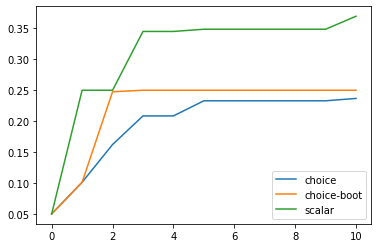

In [149]:
plt.plot(range(len(probs_of_true)), probs_of_true, label='choice')
plt.plot(range(len(probs_of_true_boot)), probs_of_true_boot, label='choice-boot')
plt.plot(range(len(probs_of_true_scalar)), probs_of_true_scalar, label='scalar')
plt.legend()
plt.show()


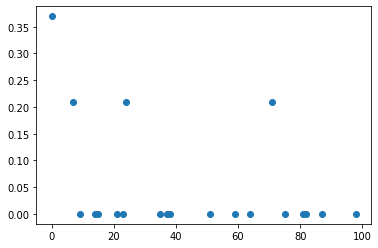

In [150]:
plt.scatter(choice_beliefs.keys(), choice_beliefs.values())
plt.show()

# Approach 1: Bootstrap scalar

In [151]:
choice_beliefs = {}
for keynum in trajs:
    choice_beliefs[keynum] = 1/len(trajs)

seen_scale = []
    
probs_of_true_scalar_boot = [1/len(trajs)]
for i in range(len(pairwise_dataset)):
    choice_i = pairwise_dataset[i]['choice']
    scale_i = pairwise_dataset[i]['scale']
    
    if choice_i == 1:
        o1, o2 = pairwise_dataset[i]['comparison']
        scale_o1, scale_o2 = scale_i
    else:
        o2, o1 = pairwise_dataset[i]['comparison']
        scale_o2, scale_o1 = scale_i
    
    o1_features = trajs[o1]['sum_feature_vector']
    o2_features = trajs[o2]['sum_feature_vector']
    
    psi = scale_o1 - scale_o2 
    mu = psi + np.random.normal(0,sigma)
    
    Z = 0
    
    for candidate_keynum in choice_beliefs:
        candidate_w = trajs[candidate_keynum]['w']
        o1_rew = np.dot(o1_features, candidate_w)
        o2_rew = np.dot(o2_features, candidate_w)

        rankings_on_scale = []
        for j in trajs:
            j_feature_vector = trajs[j]['sum_feature_vector']
            rew_wrt_keynum = np.dot(candidate_w, j_feature_vector)
            rankings_on_scale.append(rew_wrt_keynum)
        norm_rankings = [(float(i) - min(rankings_on_scale)) / (max(rankings_on_scale) - min(rankings_on_scale)) for i in rankings_on_scale]

        temp_trajs_on_scale_wrt_keynum = {}
        for j in range(len(norm_rankings)):
            key_j = list(trajs.keys())[j]
            temp_trajs_on_scale_wrt_keynum[key_j] = norm_rankings[j]
        
        
        diff = temp_trajs_on_scale_wrt_keynum[o1] - temp_trajs_on_scale_wrt_keynum[o2]
        eps = 1
        sigma = 0.1
        prob_w_given_psi_mu = 0
        for c_psi in np.arange(0, 1.1, 0.1):
            prob_psi_given_mu = norm.cdf((c_psi-mu+eps/2)/sigma) - norm.cdf((c_psi-mu-eps/2)/sigma)

            if abs(diff - (c_psi * max_diff_lookup[candidate_keynum])) < 0.1:
                prob_w_given_psi = 1
            else:
                prob_w_given_psi = 0

            prob_w_given_psi_mu += (prob_psi_given_mu * prob_w_given_psi)

            
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_psi_mu
        Z += choice_beliefs[candidate_keynum]
            
        
    for candidate_keynum in choice_beliefs:
        choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z
        
        
    # bootstrap the comparisons
    additional_comparisons = []
    for j in range(len(seen_scale)):
        oj, scale_oj = seen_scale[j]
        
        if scale_o1 > scale_oj:
            additional_comparisons.append((o1, oj, scale_o1, scale_oj))
        elif scale_o1 < scale_oj:
            additional_comparisons.append((oj, o1, scale_oj, scale_o1))
            
        if scale_o2 > scale_oj:
            additional_comparisons.append((o2, oj, scale_o2, scale_oj))
        elif scale_o2 < scale_oj:
            additional_comparisons.append((oj, o2, scale_oj, scale_o2))
    
    # make updates 
    for (oa, ob, scale_oa, scale_ob) in additional_comparisons:
        oa_features = trajs[oa]['sum_feature_vector']
        ob_features = trajs[ob]['sum_feature_vector']


        psi = scale_oa - scale_ob
        mu = psi + np.random.normal(0,sigma)

        Z = 0

        for candidate_keynum in choice_beliefs:
            candidate_w = trajs[candidate_keynum]['w']
            oa_rew = np.dot(oa_features, candidate_w)
            ob_rew = np.dot(ob_features, candidate_w)

            rankings_on_scale = []
            for j in trajs:
                j_feature_vector = trajs[j]['sum_feature_vector']
                rew_wrt_keynum = np.dot(candidate_w, j_feature_vector)
                rankings_on_scale.append(rew_wrt_keynum)
            norm_rankings = [(float(i) - min(rankings_on_scale)) / (max(rankings_on_scale) - min(rankings_on_scale)) for i in rankings_on_scale]

            temp_trajs_on_scale_wrt_keynum = {}
            for j in range(len(norm_rankings)):
                key_j = list(trajs.keys())[j]
                temp_trajs_on_scale_wrt_keynum[key_j] = norm_rankings[j]


            diff = temp_trajs_on_scale_wrt_keynum[oa] - temp_trajs_on_scale_wrt_keynum[ob]
            eps = 1
            sigma = 0.1
            prob_w_given_psi_mu = 0
            for c_psi in np.arange(0, 1.1, 0.1):
                prob_psi_given_mu = norm.cdf((c_psi-mu+eps/2)/sigma) - norm.cdf((c_psi-mu-eps/2)/sigma)

                if abs(diff - (c_psi * max_diff_lookup[candidate_keynum])) < 0.1:
                    prob_w_given_psi = 1
                else:
                    prob_w_given_psi = 0

                prob_w_given_psi_mu += (prob_psi_given_mu * prob_w_given_psi)


            choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum] * prob_w_given_psi_mu
            Z += choice_beliefs[candidate_keynum]


        for candidate_keynum in choice_beliefs:
            choice_beliefs[candidate_keynum] = choice_beliefs[candidate_keynum]/Z

        
        
        
    
    probs_of_true_scalar_boot.append(choice_beliefs[0])
    
    seen_scale.append((o1, scale_o1))
    seen_scale.append((o2, scale_o2))
    
#     break


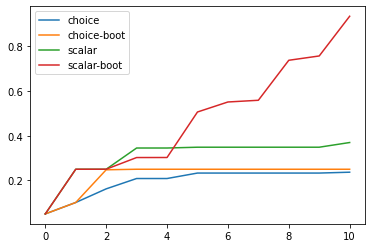

In [152]:
plt.plot(range(len(probs_of_true)), probs_of_true, label='choice')
plt.plot(range(len(probs_of_true_boot)), probs_of_true_boot, label='choice-boot')
plt.plot(range(len(probs_of_true_scalar)), probs_of_true_scalar, label='scalar')
plt.plot(range(len(probs_of_true_scalar_boot)), probs_of_true_scalar_boot, label='scalar-boot')
plt.legend()
plt.show()
